In [6]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
data = pd.read_csv('../data/train.csv')
print data.shape
print data.columns
print data.dtypes
data.head()

(891, 12)
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
cat_cols = ['Survived','Pclass','Sex','SibSp','Parch','Cabin','Embarked']
for col in cat_cols:
    print data[col].value_counts(dropna=False)
    print ''

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

NaN                687
G6                   4
C23 C25 C27          4
B96 B98              4
F2                   3
C22 C26              3
E101                 3
F33                  3
D                    3
C126                 2
E44                  2
B5                   2
C123                 2
F G73                2
C52                  2
C124                 2
C78                  2
D36                  2
D35                  2
D33                  2
C93                  2
B77                  2
B22                  2
E67                  2
B28                  2
B57 B59 B63 B66      2
E33                  2
C92                  2
B18                 

## Drop useless columns
* PassengerId has little use
* Cabin has 687 NaNs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c215a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cdd3850>]], dtype=object)

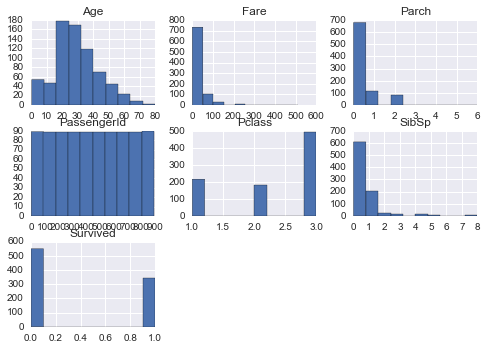

In [11]:
data.hist()


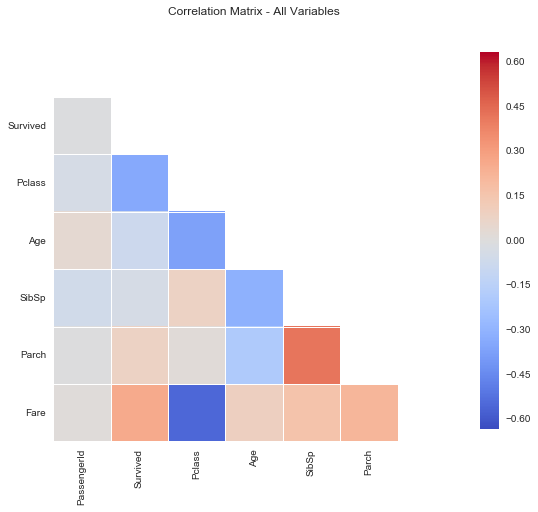

In [9]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(data, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

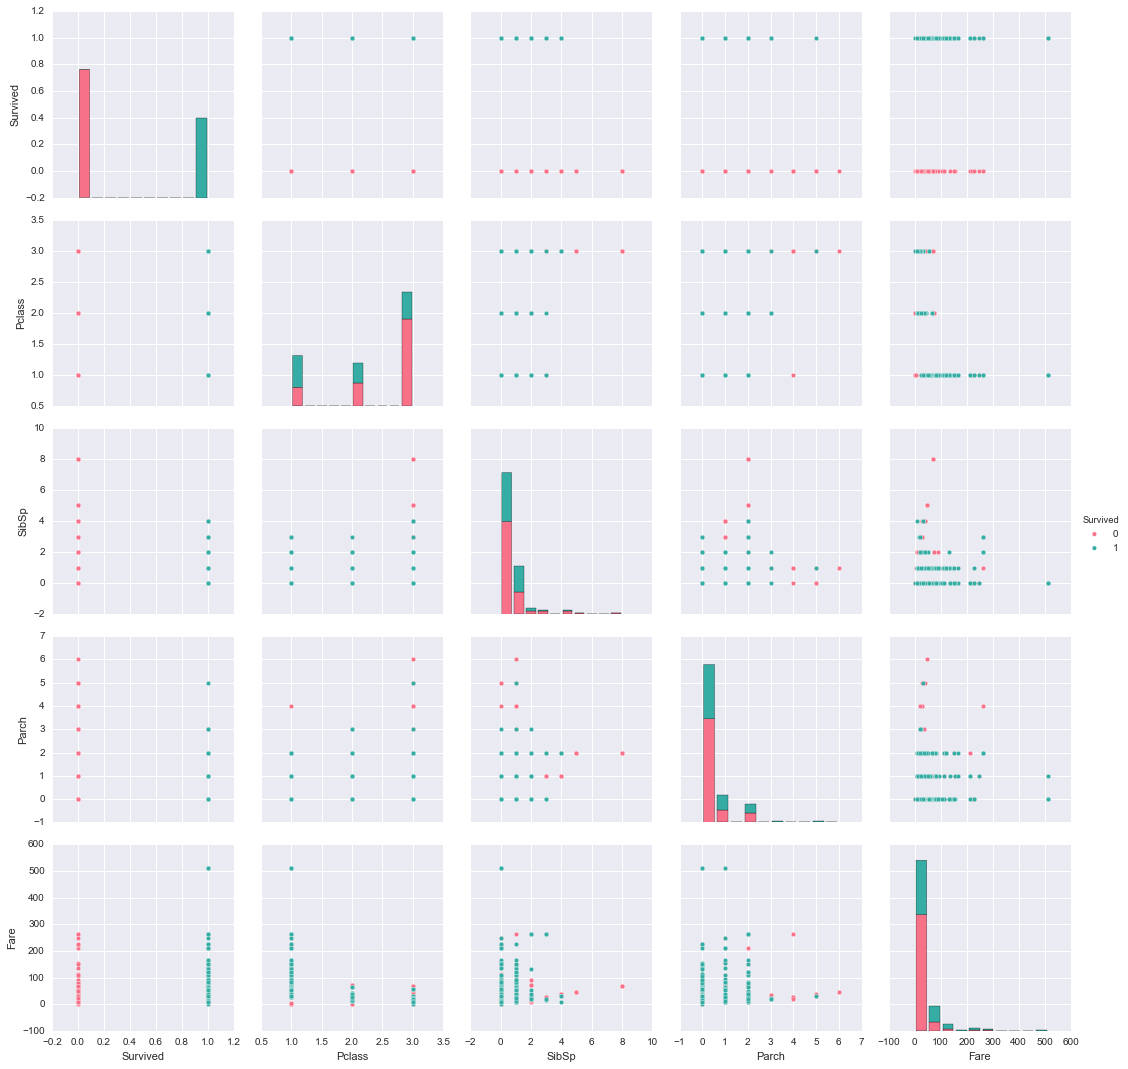

In [18]:
sns.pairplot(data,vars=[u'Survived', u'Pclass',
       u'SibSp', u'Parch', u'Fare'], hue="Survived",size=3, palette="husl")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017EBC438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000121FAD68>]], dtype=object)

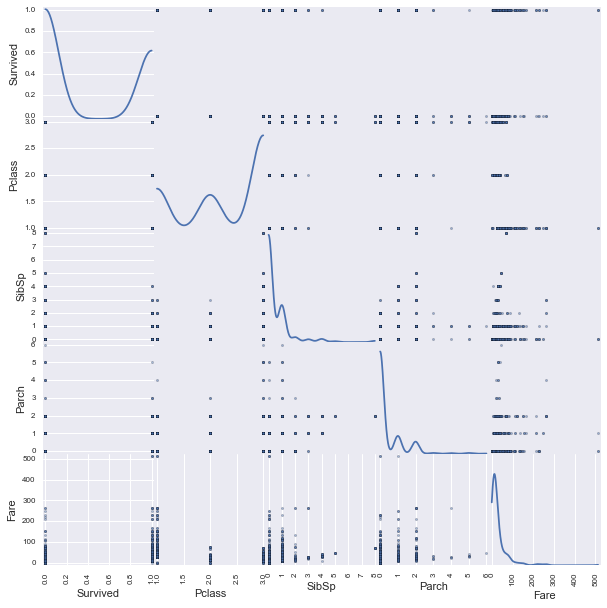

In [13]:
pd.scatter_matrix(data[[u'Survived', u'Pclass',
       u'SibSp', u'Parch', u'Fare']],figsize=(10,10),diagonal='kde')